# Introduction to Data Science
## Homework 3

Student Name: Chutang Luo

Student Netid: cl5293

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latex math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$\begin{align*}
\text{Information Gain} &= H(Y) – H(Y \mid X) \\
&=  -\sum_{y \in Y} p(y) \cdot log(p(y)) -\sum_{x \in X} p(x) \cdot H(Y \mid X = x) \\
&= -\sum_{y \in Y} \left( \sum_{x \in X} p(x,y)\right ) \cdot log(p(y))-\sum_{x \in X} p(x) \left(-\sum_{y \in Y}p(y\mid x)log (p(y\mid x)) \right )\\
&= \sum_{x \in X} p_X(x) \sum_{y \in Y}p(y \mid x)log (p(y\mid x)) -\sum_{y \in Y} \left( \sum_{x \in X} p(x,y)\right ) \cdot log(p(y)) \\
&= \sum_{y \in Y} \sum_{x \in X} p(x) p(y\mid x)log (p(y\mid x)) -\sum_{y \in Y} \sum_{x \in X}  p(x,y) \cdot log(p(y)) \\
&=\sum_{y \in Y} \sum_{x \in X} p(x,y)\cdot log (\frac{p(x,y)}{ p(x)}) -\sum_{y \in Y} \sum_{x \in X}  p(x,y) \cdot log(p(y)) \\
&=\sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}=\text{Mutual Information}
\end{align*}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [3]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv('cell2cell_data.csv')
print(df.head())

train_df=df.sample(frac=0.8, random_state=1)
test_df=df[~df.index.isin(train_df.index)]

   revenue  outcalls  incalls  months  eqpdays  webcap  marryyes  travel  \
0    48.82     10.00      3.0      26      780       0         0       0   
1    83.53     20.00      1.0      31      745       1         0       0   
2    29.99      0.00      0.0      52     1441       0         0       0   
3    51.42      0.00      0.0      36       59       1         0       0   
4    37.75      2.67      0.0      25      572       0         0       0   

   pcown  creditcd  retcalls  churndep  
0      0         1         4         1  
1      0         0         4         1  
2      1         1         3         1  
3      0         0         4         1  
4      1         1         3         1  


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

We can prove that  our data was indeed randomly sampled on X by showing that the rate of churn in the training data set and testing data set is exactly the same as the rate of churn in the entire dataset. This means being churn has nothing to do with the data is in training set or testing set, P(churn |training)=(churn | testing)=P(churn).Therefore, there is no selection bias and the data was  randomly sampled on X.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(
    criterion='entropy')
train_y=train_df['churndep'].values
train_X=train_df.drop('churndep',axis=1).values
test_y=test_df['churndep'].values
test_X=test_df.drop('churndep',axis=1).values
model=dtc.fit(train_X,train_y)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

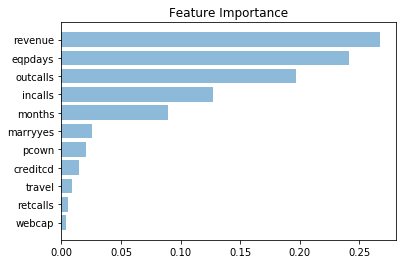

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
names = [train_df.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.barh(range(train_X.shape[1]),importances[indices],align='center', alpha=0.5)
plt.yticks(range(train_X.shape[1]), names)
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [6]:
np.corrcoef(train_df['revenue'],train_df['churndep'])

array([[ 1.        , -0.01227236],
       [-0.01227236,  1.        ]])

In [7]:
np.corrcoef(train_df['eqpdays'],train_df['churndep'])

array([[1.        , 0.11430687],
       [0.11430687, 1.        ]])

In [8]:
np.corrcoef(train_df['outcalls'],train_df['churndep'])

array([[ 1.        , -0.03542068],
       [-0.03542068,  1.        ]])

The top 3 most important feature are "Mean monthly revenue in dollars","Number of days the customer has had his/her current equipment" and "Mean number of outbound voice calls". (1) "Mean monthly revenue in dollars" has a negative relationship with "churndep". If a customer has higher mean monthly revenue in dollars,  he/she would be less likely to churn. In real life, customers with higher income may not care that much about money, and he/she may get used to the service of the certain company and would not make a change so often. Customers with lower income may keep seeking a cheaper service and try to save more money, so they may be easier to churn.  (2)"Number of days the customer has had his/her current equipment" has a positive relationship with "churndep". Customers who have their current equipment for a longer time are more likely to churn. These kinds of customers may more likely tend to change for a new equipment and by that time, they may change the company providing the service as well.  (3)"Mean number of outbound voice calls" has a negative relationship with "churndep". If a customer has more voice calls, he/she would be less likely to churn. Customers who make more phone calls are more likely to think that the service is very helpful for them, so they are less likely to churn.

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [6]:
from sklearn.metrics import accuracy_score
train_y_pred=model.predict(train_X)
print('The accuracy on train_df data sets = {}'.format(accuracy_score(train_y,train_y_pred)))
test_y_pred=model.predict(test_X)
print('The accuracy on train_df data sets = {}'.format(accuracy_score(test_y,test_y_pred)))


The accuracy on train_df data sets = 0.9998118355442657
The accuracy on train_df data sets = 0.5293527345709985


The accuracy is high in training data set but become relative low in testing data set. It is highly likely that the difference occurs because the model is overfitting. It did perform well in the training data set, but when given a new testing data set, the overfitted model does not work so well and has low accuracy.

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [31]:
# Code here

min_samples_split_values = list(range(100,1001,100)) 
min_samples_leaf_values = list(range(10,500,50)) 

2\. Explain in words your reasoning for choosing the above ranges.

The data set we have is large, so both the min_samples_split and min_samples_leaf need to have a higher value to avoid overfitting. In the end, I chose the above ranges by running the code the in part 3.3 and found out these are the optimal ranges.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

Text(0.5, 1.0, 'Accuracy by Hyperparameters')

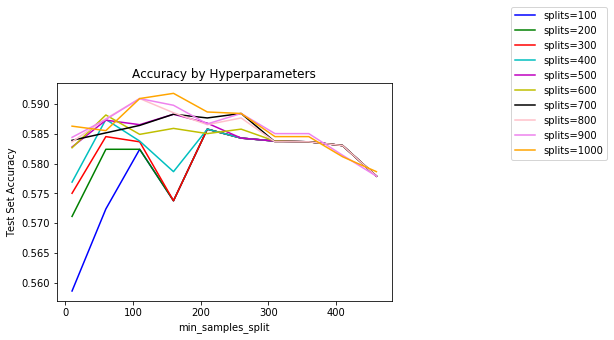

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

def testTreesAccuracy(X_train, y_train, X_test, y_test, split, leaf):
    dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, min_samples_split = split)
    model = dtc.fit(X_train, y_train)
    #print(accuracy_score(y_test,model.predict(X_test)),split,leaf)
    return accuracy_score(y_test,model.predict(X_test))
    
splits = min_samples_split_values
leaves = min_samples_leaf_values

res1 = dict()
for d in splits:
    res1[d] = list()


for d in splits:
    for l in leaves:
        res1[d].append(testTreesAccuracy(train_X, train_y, test_X, test_y, d, l))
            
fig = plt.figure()
ax=fig.add_subplot(111)
colors=['b','g','r','c','m','y','k','pink','violet','orange']
for i in range(0,10):
    plt.plot(leaves,res1[splits[i]], colors[i], label = 'splits={}'.format(splits[i]))
plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
ax.set_xlabel('min_samples_split')
ax.set_ylabel('Test Set Accuracy')
plt.title('Accuracy by Hyperparameters')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [53]:
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 160, min_samples_split = 1000)
model = dtc.fit(train_X, train_y)
test_y_pred=model.predict(test_X)
print('The accuracy on train_df data sets = {}'.format(accuracy_score(test_y,test_y_pred)))

The accuracy on train_df data sets = 0.5918213748118415


When min_samples_leaf = 160 and min_samples_split = 1000, the accuracy reaches the best and it is 0.5918213748118415.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

With the churn prediction model, we can predict the customer churn better, so that we can take actions to maintain current customers and improve the company's revenue. With a more concrete prediction, we can run campaign and develop different kinds of service for different potential churn customers. Through the analysis of the importance of the features, we can find out what features play a significant role in customer churn. We have already known that customers with lower monthly income are more likely to churn. With such informaiton, marketing department can do a survey on this group of customers and work out what they need, so that the company could find ways to better maintain these customers. Different features needs different strategies to the customers. With the prediction model, we can develop more efficient and concrete strategies, know better about how we could advance our service in order to improve churn. Consequently we could have more customers and have more profits. That's why churn prediction would be good for the business.